<a href="https://colab.research.google.com/github/Md-Amanullah10/Face-Mask-Detection/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
 !pip install kaggle

In [17]:
#configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Extracting face mask dataset**

In [18]:
import os
import zipfile

dataset = '/content/archive (1).zip'

# Check if the file exists
if not os.path.exists(dataset):
  print(f"Error: File not found at {dataset}. Please check the path.")
else:
  # Check if the file is a valid zip file
  try:
    with zipfile.ZipFile(dataset, 'r') as zip_ref:
        zip_ref.testzip()  # Raises BadZipFile if corrupted
        print("File is a valid zip archive.")
  except zipfile.BadZipFile:
    print(f"Error: File at {dataset} is not a valid zip file. It might be corrupted or of a different format.")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")

File is a valid zip archive.


In [19]:
!ls

'archive (1).zip'   sample_data


**Importing the dependencies**

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
#used for image processing
from google.colab.patches import cv2_imshow
from PIL import Image
#used for image processing,its a lib to read images
from sklearn.model_selection import train_test_split
#used to split our data into training and testing data

In [26]:
with_mask_files = os.listdir('/content/dataset/data/with_mask')
#this will create a list of directory which contains all the file names with mask folder
without_mask_files =os.listdir('/content/dataset/data/without_mask')

In [27]:
print(with_mask_files[0:6])

['with_mask_1582.jpg', 'with_mask_120.jpg', 'with_mask_2208.jpg', 'with_mask_155.jpg', 'with_mask_2747.jpg', 'with_mask_1842.jpg']


In [28]:
print(without_mask_files[0:5])

['without_mask_509.jpg', 'without_mask_2086.jpg', 'without_mask_3085.jpg', 'without_mask_2510.jpg', 'without_mask_1884.jpg']


In [29]:
print('Number of with mask images',len(with_mask_files))
print('Number of without mask images',len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


**Creating Labels for the two class of Images**

with mask-->1


without mask-->0

In [30]:
#create the labels
with_mask_labels=[1]*3725

without_mask_labels=[0]*3828

In [31]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])



[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [32]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [33]:
#adding both the mask and without mask labels together
labels=with_mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

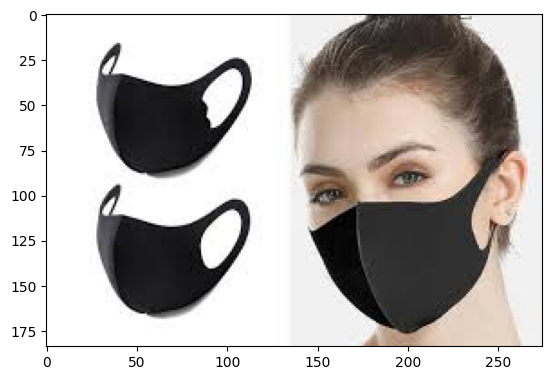

In [35]:
#displaying with mask image
#imread() fn reads the images in the form of a numpy array
img =mpimg.imread('/content/dataset/data/with_mask/with_mask_2091.jpg')
imgplot=plt.imshow(img)
plt.show()

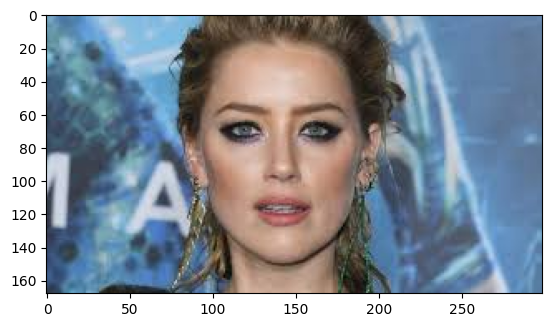

In [36]:
#displaying with mask image
#imread() fn reads the images in the form of a numpy array
img =mpimg.imread('/content/dataset/data/without_mask/without_mask_2927.jpg')
imgplot=plt.imshow(img)
plt.show()

In [37]:
#As the size of the images are different so we need to keep this thing in mind that these images need to be resized while processing.


**Image Processing**

1.Resize the Images

2.Convert the images to numpy arrays


In [38]:
#Convert images to numpy arrays

with_mask_path='/content/dataset/data/with_mask/'

data=[]

for img_file in with_mask_files:

  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image.convert('RGB')
  image=np.array(image)
  if image.shape == (128, 128, 3): # Check for correct shape before appending
   data.append(image)



without_mask_path='/content/dataset/data/without_mask/'

for img_file in without_mask_files:

  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image.convert('RGB')
  image=np.array(image)
  if image.shape == (128, 128, 3): # Check for correct shape before appending
   data.append(image)


#Converting image list(data) and label list to numpy array

X=np.array(data)
Y=np.array(labels)

if X.shape[0] != Y.shape[0]:
    print("Warning: X and Y have different numbers of samples.")
    min_samples = min(X.shape[0], Y.shape[0])
    X = X[:min_samples]
    Y = Y[:min_samples]
    print("Shapes after adjustment:")
    print("Shape of X:", X.shape)
    print("Shape of Y:", Y.shape)



/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Shapes after adjustment:
Shape of X: (7544, 128, 128, 3)
Shape of Y: (7544,)


In [39]:


len(data)

7544

In [40]:

type(data)

list

array([[[ 99,  65,  19],
        [100,  66,  20],
        [101,  67,  21],
        ...,
        [166, 209, 244],
        [184, 217, 240],
        [229, 248, 253]],

       [[ 98,  64,  18],
        [ 99,  65,  19],
        [100,  66,  20],
        ...,
        [166, 210, 245],
        [185, 217, 241],
        [230, 248, 253]],

       [[ 98,  64,  18],
        [ 98,  64,  18],
        [ 99,  65,  19],
        ...,
        [166, 210, 245],
        [185, 218, 241],
        [230, 248, 253]],

       ...,

       [[ 42,  35,  25],
        [ 46,  36,  23],
        [ 53,  39,  21],
        ...,
        [ 19,  39,  78],
        [ 24,  46,  85],
        [ 27,  50,  89]],

       [[ 42,  35,  25],
        [ 46,  36,  23],
        [ 53,  39,  21],
        ...,
        [ 15,  35,  74],
        [ 17,  39,  79],
        [ 20,  44,  82]],

       [[ 42,  35,  25],
        [ 46,  36,  23],
        [ 53,  39,  21],
        ...,
        [ 13,  33,  72],
        [ 13,  35,  75],
        [ 16,  40,  78]]], dtype=uint8)
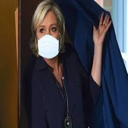

In [41]:
data[0]

In [42]:
type(data[0])

numpy.ndarray

In [43]:
data[0].shape

(128, 128, 3)

In [44]:

type(X)

numpy.ndarray

In [45]:
type(Y)

numpy.ndarray

In [46]:
print(X.shape)
print(Y.shape)

(7544, 128, 128, 3)
(7544,)


In [47]:
print(Y)

[1 1 1 ... 0 0 0]


**
**

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(7544, 128, 128, 3) (6035, 128, 128, 3) (1509, 128, 128, 3)


In [50]:
#scaling the data

X_train_scaled=X_train/255

X_test_scaled=X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
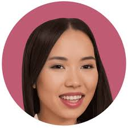

In [51]:
X_train[0]

In [52]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**Building a Convolutional Neural Network(CNN)**

In [53]:
import tensorflow as tf
from tensorflow import keras

num_of_classes=2

model= keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#Compile the nueral network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

#Training a nueral network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - acc: 0.7004 - loss: 0.6757 - val_acc: 0.8974 - val_loss: 0.2519
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8820 - loss: 0.2980 - val_acc: 0.8957 - val_loss: 0.2504
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8973 - loss: 0.2554 - val_acc: 0.9172 - val_loss: 0.2291
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9248 - loss: 0.1934 - val_acc: 0.9106 - val_loss: 0.2378
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9399 - loss: 0.1545 - val_acc: 0.9139 - val_loss: 0.2732


**Model evaluation to check whether the model is performing on outside data**

In [55]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9202 - loss: 0.1806
Test Accuracy = 0.9184890389442444


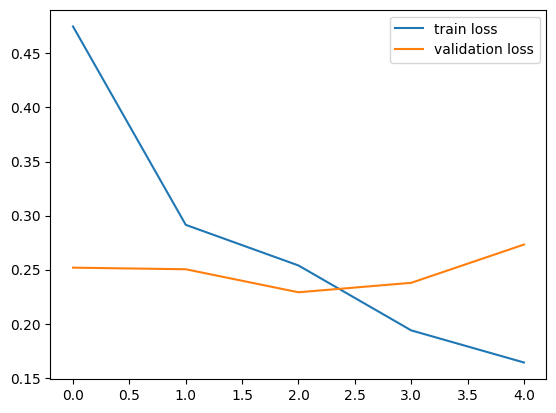

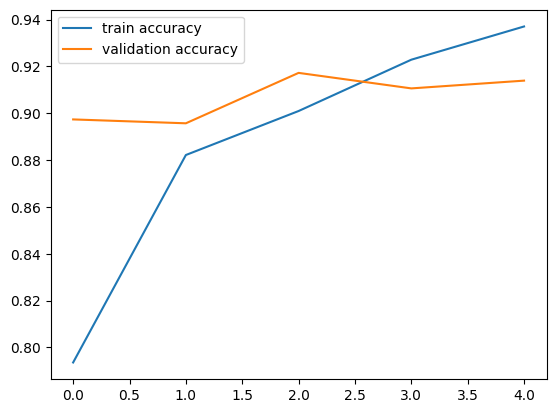

In [56]:
h= history

#plot the loss value

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted:/content/mask1.jpg


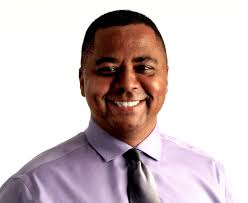

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.35383046 0.6996496 ]]
1
The person in the image is not wearing mask


In [60]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

# Check if image was loaded successfully
if input_image is None:
    print(f"Error: Could not load image from {input_image_path}. Please check the path and file.")
else:
    cv2_imshow(input_image)
    input_image_resized = cv2.resize(input_image, (128, 128))

    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    if input_pred_label == 0:
        print('The person in the image is wearing mask')
    else:
        print('The person in the image is not wearing mask')